1. understand dataset

In [2]:
# !pip install pandas

In [3]:
import pandas as pd

df = pd.read_csv('data/titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2. summary statistics

In [5]:
# numerical
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# categorical
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
# avg fare by survived
df.groupby("Survived")["Fare"].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

3. missing data analysis

In [8]:
# missing values per column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# percentage of misssing values
df.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [24]:
# handle missing data
# has cabin 1 / no cabin 0
df["Has_cabin"] = df["Cabin"].notnull().astype(int)
df["Has_cabin"].value_counts()

Has_cabin
0    687
1    204
Name: count, dtype: int64

4. Data Visualization

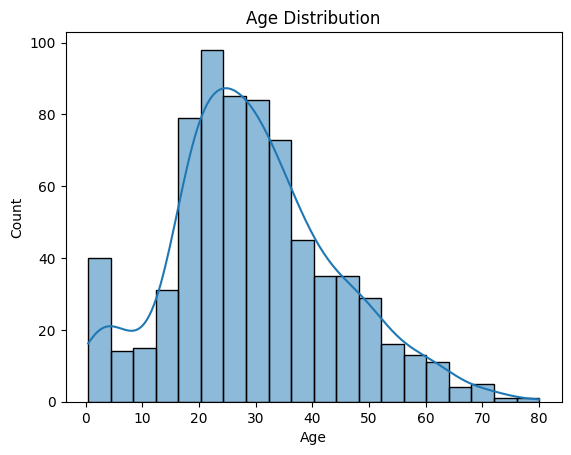

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# age distribution
sns.histplot(df["Age"].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

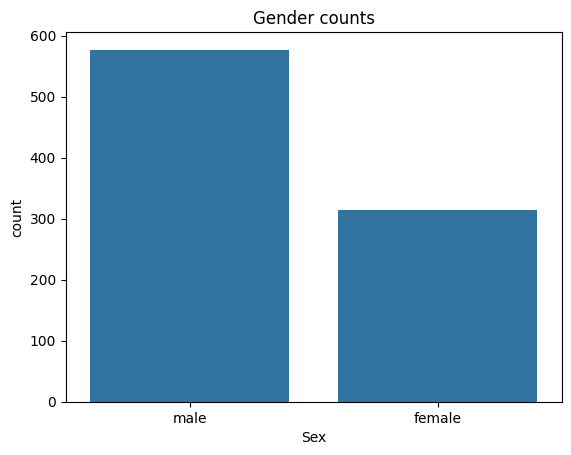

In [16]:
# gender counts
sns.countplot(data=df, x='Sex')
plt.title('Gender counts')
plt.show()

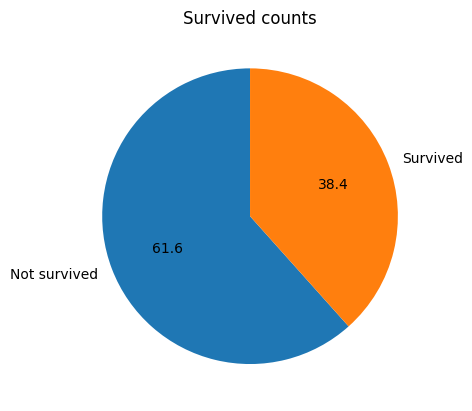

In [19]:
# survival counts
survival_counts = df["Survived"].value_counts()
plt.pie(
    survival_counts,
    labels=survival_counts.index.map({0: "Not survived", 1: "Survived"}),
    autopct="%1.1f",
    startangle=90
)
plt.title("Survived counts")
plt.show()

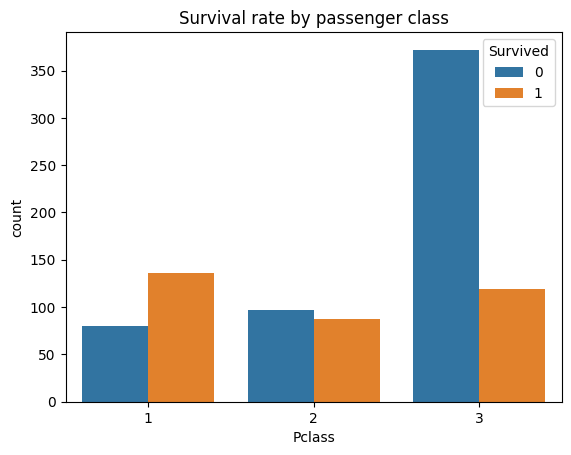

In [ ]:
# compare survival rate by class
sns.countplot(x="Pclass", data=df, hue="Survived")
plt.title("Survival rate by passenger class")
plt.show()

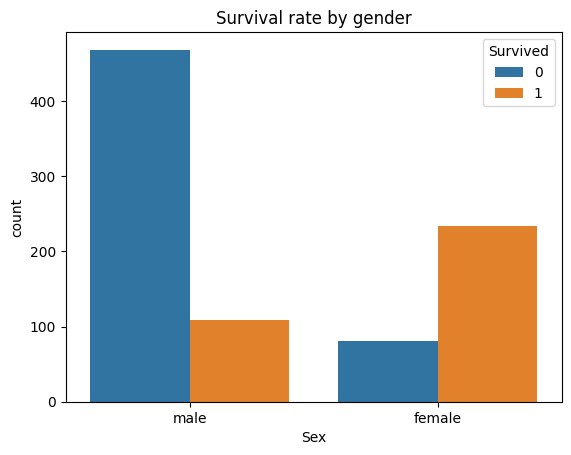

In [21]:
# compare survival rate by gender
sns.countplot(x="Sex", data=df, hue="Survived")
plt.title("Survival rate by gender")
plt.show()

5. Data cleaning

In [22]:
# remove duplicates
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  has_cabin    891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
# drop Cabin column
# df = df.drop(columns=['Cabin'])

In [31]:
# age -> fill with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# embarked -> fill with mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [33]:
# encode categorical columns
# Sex -> male=0 / female=1
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Embarked: use pandas factorize
df["Embarked"] = pd.factorize(df["Embarked"])[0]

one-hot encoding (`get_dummies`) is the standard for categorical variables in most machine learning workflows.

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0


6. Basic Insights

In [ ]:
# overall survival rate
print(df['Survived'].mean() * 100)

# => 38% survived

38.38383838383838


In [ ]:
# survival rate by class
df.groupby("Pclass")["Survived"].mean() * 100

# => higher ticket class = higher survival rate

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [ ]:
# survival rate by gender
df.groupby("Sex")["Survived"].mean() * 100

# => 74.2% of females survived, 20.2% of males survived

Sex
0    18.890815
1    74.203822
Name: Survived, dtype: float64

In [ ]:
# age bins
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 18, 30, 50, 80],
    labels=["Child", "Teenager", "Young Adult", "Adult", "Senior"])

# survival rate by age group 
df.groupby("AgeGroup")["Survived"].mean() * 100

# => children have the highest survival rate -> women and children first rule

/tmp/ipykernel_134079/177608365.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AgeGroup")["Survived"].mean() * 100


AgeGroup
Child          57.971014
Teenager       42.857143
Young Adult    33.109620
Adult          42.323651
Senior         34.375000
Name: Survived, dtype: float64

7. Feature Engineering

In [46]:
# FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [47]:
# IsAlone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [ ]:
# survival rates Family vs Alone
df.groupby('FamilySize')['Survived'].mean() * 100

# => 2-4 members => 55-72% survival
# => large families => lower survival


FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

In [ ]:
df.groupby("IsAlone")["Survived"].mean() * 100

# => Alone lower chance of survival

IsAlone
0    50.564972
1    30.353818
Name: Survived, dtype: float64

8. Advanced visualization

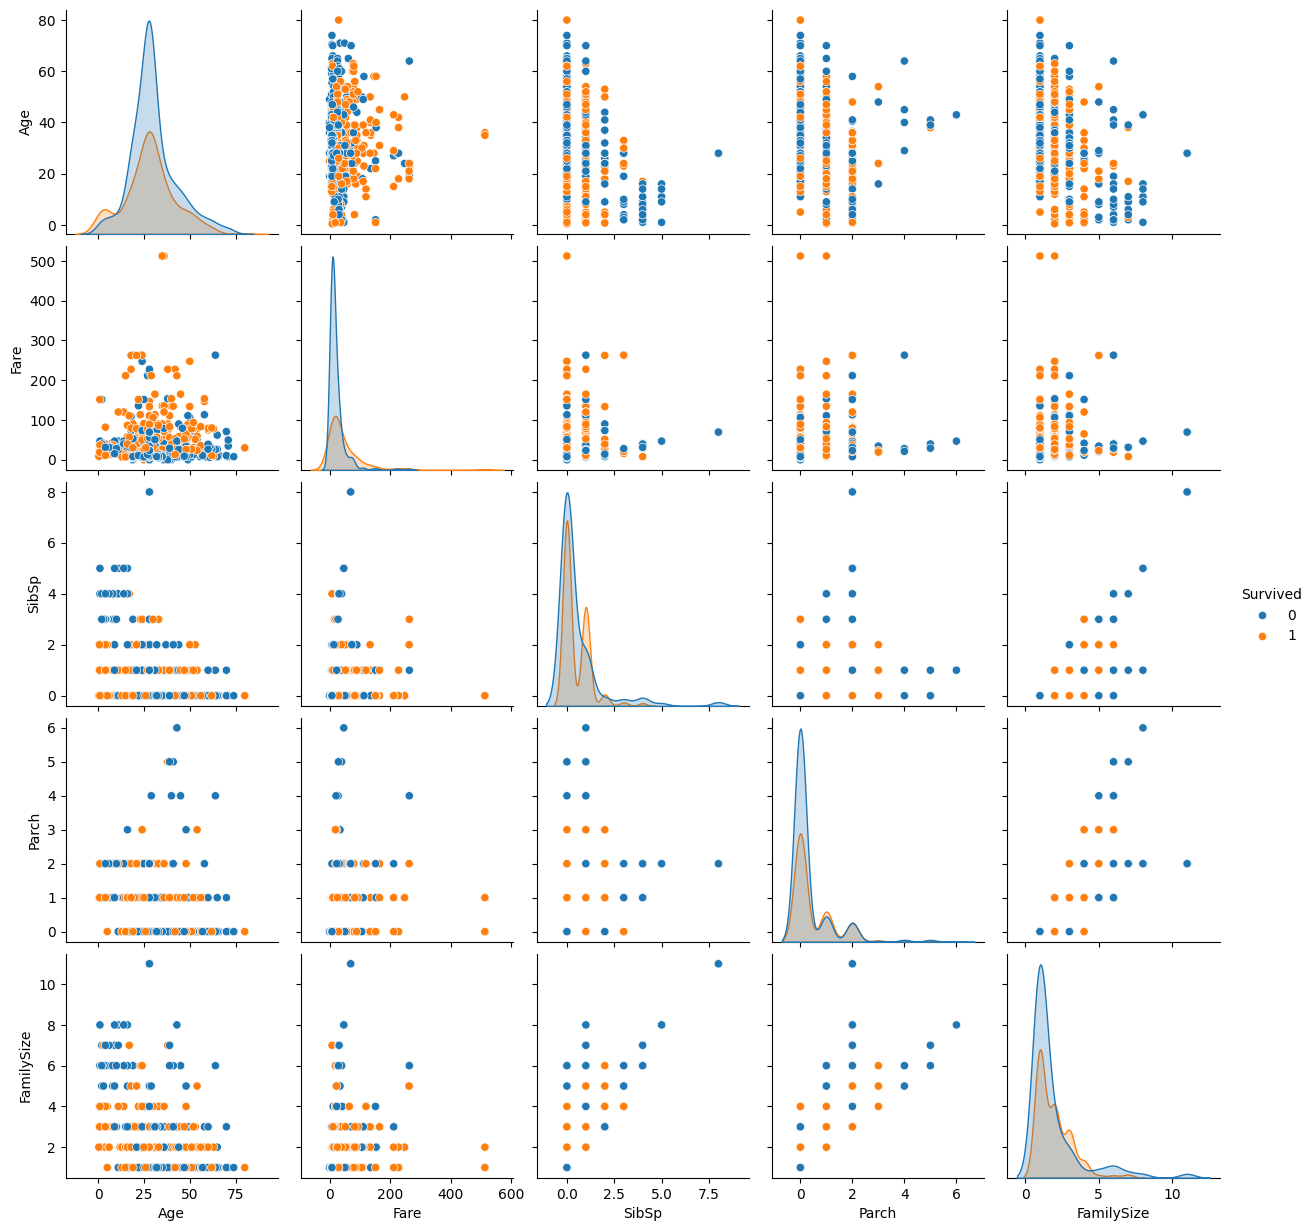

In [52]:
# pair plot
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize', 'Survived']],
hue='Survived', diag_kind='kde')

plt.show()

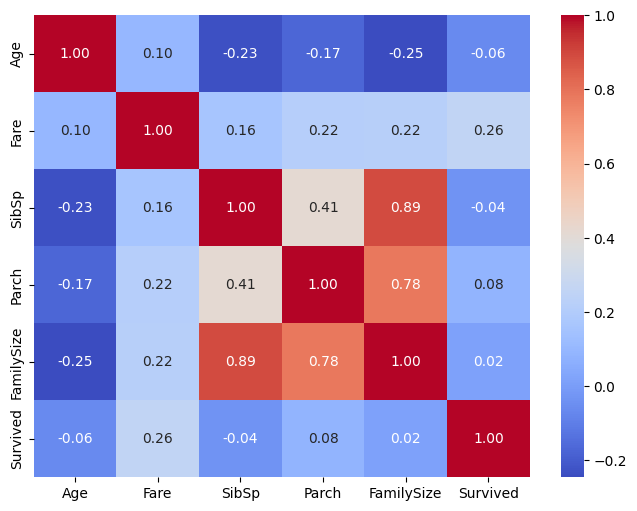

In [ ]:
# correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age','Fare','SibSp','Parch','FamilySize','Survived']].corr(),
annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# => fare positive correlation with survival
# => familySize  and parch/sibsp highly correlated (redundant info)
# => age has weak correlation with survival


In [54]:
# mini predictive task
df['Prediction'] = 0  # everyone dies by default
df.loc[(df['Sex'] == 'female') | (df['Pclass'] == 1), 'Prediction'] = 1

In [57]:
# check accuracy
accuracy = (df['Prediction'] == df['Survived']).mean()
print("Rule based Accuracy: ", accuracy * 100)

Rule based Accuracy:  67.90123456790124
